In [1]:
print("holla")

holla


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [9]:
mnist = tf.keras.datasets.mnist #labeled data (supervised learning)
(x_train, y_train), (x_test, y_test) = mnist.load_data() #x is the image, y is the label

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) #flatten input into 784x1
model.add(tf.keras.layers.Dense(128, activation='relu')) #add relu layer
model.add(tf.keras.layers.Dense(128, activation='relu')) #add relu layer
model.add(tf.keras.layers.Dense(10, activation='softmax')) #output layer with 10 neurons (numbers ranging from 0-9)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

model.save('digitRecognition.model')

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2651 - accuracy: 0.9226
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1070 - accuracy: 0.9679
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0725 - accuracy: 0.9770


INFO:tensorflow:Assets written to: digitRecognition.model\assets


INFO:tensorflow:Assets written to: digitRecognition.model\assets


In [ ]:
model = tf.keras.models.load_model('digitRecognition.model')

In [10]:
loss, accuracy = model.evaluate(x_test, y_test)

print(loss)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0942 - accuracy: 0.9719
0.09420536458492279
0.9718999862670898


1/1 [==============================] - 0s 221ms/step
This digit is probgably a 3


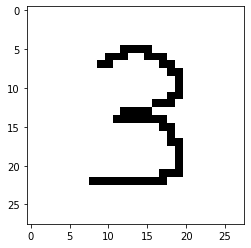

1/1 [==============================] - 0s 39ms/step
This digit is probgably a 2


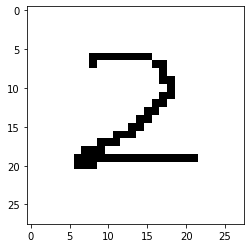

1/1 [==============================] - 0s 27ms/step
This digit is probgably a 5


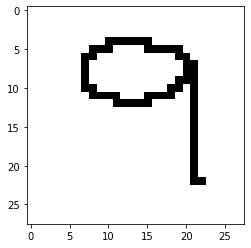

1/1 [==============================] - 0s 25ms/step
This digit is probgably a 4


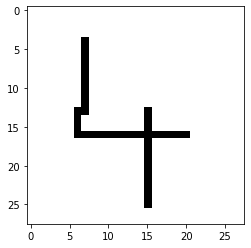

1/1 [==============================] - 0s 30ms/step
This digit is probgably a 7


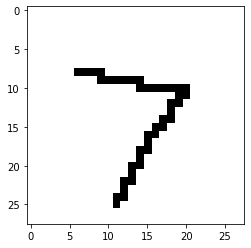

1/1 [==============================] - 0s 23ms/step
This digit is probgably a 1


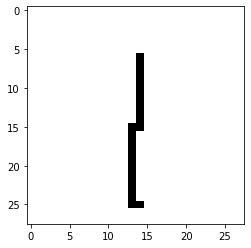

In [12]:
image_number = 1
while os.path.isfile(f"digits/digit{image_number}.png"):
    try:
        img = cv2.imread(f"digits/digit{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"This digit is probgably a {np.argmax(prediction)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print("Error!")
    finally:
        image_number += 1
        